In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("amazon.csv")

In [5]:
print("Top 5 rows of the dataset:")
print(data.head())

Top 5 rows of the dataset:
   year state    month  number        date
0  1998  Acre  Janeiro     0.0  01-01-1998
1  1999  Acre  Janeiro     0.0  01-01-1999
2  2000  Acre  Janeiro     0.0  01-01-2000
3  2001  Acre  Janeiro     0.0  01-01-2001
4  2002  Acre  Janeiro     0.0  01-01-2002


In [6]:
print("\nLast 5 rows of the dataset:")
print(data.tail())



Last 5 rows of the dataset:
      year      state     month  number        date
6449  2012  Tocantins  Dezembro   128.0  01-01-2012
6450  2013  Tocantins  Dezembro    85.0  01-01-2013
6451  2014  Tocantins  Dezembro   223.0  01-01-2014
6452  2015  Tocantins  Dezembro   373.0  01-01-2015
6453  2016  Tocantins  Dezembro   119.0  01-01-2016


In [7]:
print("\nShape of the dataset:")
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")


Shape of the dataset:
Rows: 6454, Columns: 5


In [8]:
print("\nDataset information:")
print(data.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB
None


In [9]:
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    data = data.drop_duplicates()
    print("Duplicate rows dropped.")


Number of duplicate rows: 32
Duplicate rows dropped.


In [10]:
print("\nNull values in the dataset:")
print(data.isnull().sum())


Null values in the dataset:
year      0
state     0
month     0
number    0
date      0
dtype: int64


In [11]:
print("\nOverall statistics of the dataframe:")
print(data.describe())


Overall statistics of the dataframe:
              year       number
count  6422.000000  6422.000000
mean   2007.490969   108.815178
std       5.731806   191.142482
min    1998.000000     0.000000
25%    2003.000000     3.000000
50%    2007.000000    24.497000
75%    2012.000000   114.000000
max    2017.000000   998.000000


In [10]:
month_mapping = {
    'jan': 'January', 'fev': 'February', 'mar': 'March', 'abr': 'April',
    'mai': 'May', 'jun': 'June', 'jul': 'July', 'ago': 'August',
    'set': 'September', 'out': 'October', 'nov': 'November', 'dec': 'December'
}
data['month'] = data['month'].map(month_mapping)
print("\nUpdated month names:")
print(data['month'].unique())


Updated month names:
[nan]


In [11]:
total_fires = data['number'].sum()
print(f"\nTotal number of fires registered: {total_fires}")


Total number of fires registered: 698811.073


In [13]:
max_fires = data.groupby('month')['number'].sum()
max_fires

month
Abril        28184.770
Agosto       88050.435
Dezembro     57535.480
Fevereiro    30839.050
Janeiro      47681.844
Julho        92319.113
Junho        55997.675
Maio         34725.363
Mar‡o        30709.405
Novembro     85508.054
Outubro      88681.579
Setembro     58578.305
Name: number, dtype: float64

In [14]:
max_fire_month = max_fires.idxmax()
max_fire = max_fires.max()
print("The month with maximum fire is:",max_fire_month)
print("The total number of fire in that month is:",max_fire)

The month with maximum fire is: Julho
The total number of fire in that month is: 92319.113


In [16]:
max_fire_year = data.groupby('year')['number'].sum()
max_fire_year

year
1998    20013.971
1999    26882.821
2000    27351.251
2001    29054.612
2002    37390.600
2003    42760.674
2004    38450.163
2005    35004.965
2006    33824.161
2007    33028.413
2008    29378.964
2009    39116.178
2010    37037.449
2011    34633.545
2012    40084.860
2013    35137.118
2014    39621.183
2015    41208.292
2016    42212.229
2017    36619.624
Name: number, dtype: float64

In [17]:
max_fire_year_name = max_fire_year.idxmax()
max_fires = max_fire_year.max()
print("The year with the maximum number of fire is:",max_fire_year_name)
print("The maximum number of fire in that year is:",max_fires)

The year with the maximum number of fire is: 2003
The maximum number of fire in that year is: 42760.674


In [19]:
max_fire_state = data.groupby('state')['number'].max()
max_fire_state

state
Acre                960.0
Alagoas             162.0
Amapa               969.0
Amazonas            998.0
Bahia               995.0
Ceara               995.0
Distrito Federal    196.0
Espirito Santo      307.0
Goias               943.0
Maranhao            972.0
Mato Grosso         979.0
Minas Gerais        959.0
Paraiba             987.0
Par                 982.0
Pernambuco          859.0
Piau                943.0
Rio                 885.0
Rondonia            969.0
Roraima             820.0
Santa Catarina      765.0
Sao Paulo           981.0
Sergipe             198.0
Tocantins           989.0
Name: number, dtype: float64

In [20]:
max_fire_state_name = max_fire_state.idxmax()
max_fire = max_fire_state.max()
print("The state with the maximum number of fire is:",max_fire_state_name)
print("The maximum number of fire in that state is:",max_fire)

The state with the maximum number of fire is: Amazonas
The maximum number of fire in that state is: 998.0


In [22]:
fire_amazonas = data[data['state']=='Amazonas']
total=fire_amazonas['number'].sum()
total

30650.129

In [24]:
amazons_fire_year = data.groupby('year')['number'].sum()
print("The number of fire in Amazons year-wise is:\n",amazons_fire_year)

The number of fire in Amazons year-wise is:
 year
1998    20013.971
1999    26882.821
2000    27351.251
2001    29054.612
2002    37390.600
2003    42760.674
2004    38450.163
2005    35004.965
2006    33824.161
2007    33028.413
2008    29378.964
2009    39116.178
2010    37037.449
2011    34633.545
2012    40084.860
2013    35137.118
2014    39621.183
2015    41208.292
2016    42212.229
2017    36619.624
Name: number, dtype: float64


In [25]:
amazonas_fire_date = data.groupby('date')['number'].sum()
amazonas_fire_date

date
01-01-1998    20013.971
01-01-1999    26882.821
01-01-2000    27351.251
01-01-2001    29054.612
01-01-2002    37390.600
01-01-2003    42760.674
01-01-2004    38450.163
01-01-2005    35004.965
01-01-2006    33824.161
01-01-2007    33028.413
01-01-2008    29378.964
01-01-2009    39116.178
01-01-2010    37037.449
01-01-2011    34633.545
01-01-2012    40084.860
01-01-2013    35137.118
01-01-2014    39621.183
01-01-2015    41208.292
01-01-2016    42212.229
01-01-2017    36619.624
Name: number, dtype: float64

In [26]:
fire_report = data[data['year']==2015]
fire_report

,year,state,month,number,date
17,2015,Acre,Janeiro,1.000,01-01-2015
37,2015,Acre,Fevereiro,2.000,01-01-2015
57,2015,Acre,Mar‡o,2.000,01-01-2015
77,2015,Acre,Abril,3.000,01-01-2015
97,2015,Acre,Maio,2.000,01-01-2015
...,...,...,...,...,...
6372,2015,Tocantins,Agosto,2.540,01-01-2015
6392,2015,Tocantins,Setembro,5.510,01-01-2015
6412,2015,Tocantins,Outubro,4.844,01-01-2015
6432,2015,Tocantins,Novembro,833.000,01-01-2015


In [27]:
fire_report.groupby('month')['number'].sum()

month
Abril        2573.000
Agosto       4363.125
Dezembro     4088.522
Fevereiro    2309.000
Janeiro      4635.000
Julho        4364.392
Junho        3260.552
Maio         2384.000
Mar‡o        2202.000
Novembro     4034.518
Outubro      4499.525
Setembro     2494.658
Name: number, dtype: float64

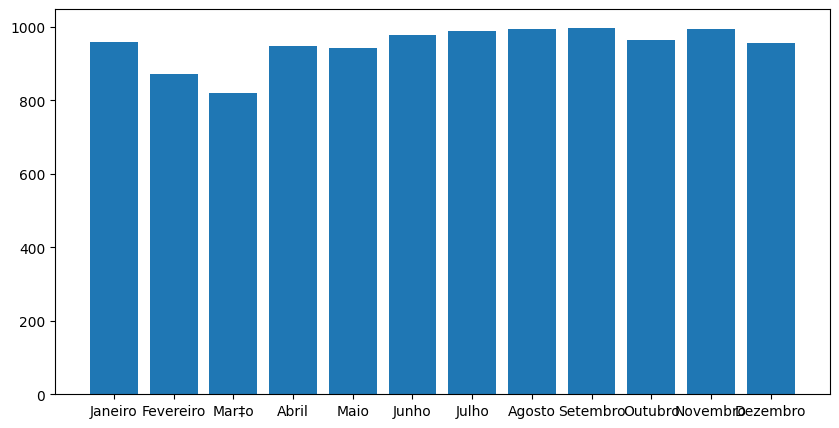

In [29]:
plt.figure(figsize=(10,5))
plt.bar(data['month'],data['number'])
plt.show()

In [30]:
avg_fire = data.groupby('state')['number'].mean().sort_values(ascending=False)
avg_fire

state
Sao Paulo           213.896226
Mato Grosso         203.479975
Bahia               187.222703
Piau                158.174674
Goias               157.721841
Minas Gerais        156.800243
Tocantins           141.037176
Amazonas            128.243218
Ceara               127.314071
Paraiba             111.073979
Maranhao            105.142808
Par                 102.561272
Pernambuco          102.502092
Roraima             102.029598
Santa Catarina      101.924067
Amapa                91.345506
Rondonia             84.876272
Acre                 77.255356
Rio                  64.698515
Espirito Santo       27.389121
Alagoas              19.271967
Distrito Federal     14.899582
Sergipe              13.543933
Name: number, dtype: float64

In [34]:
fire_reported = data[data['month']=='December']['state'].unique()
fire_reported

array([], dtype=object)